# Air Quality Data Set Analysis

## Data Description

The Air Quality Data Set was obtained from the [University of California - Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/00360/)

**Data Set Information:**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx), and Nitrogen Dioxide (NO2) were provided by a co-located reference certified analyzer. Missing values are tagged with -200 value.

**Attribute Information:**

| Index | Column Name | Description | Units |
|:---: | :--- | :--- | :---: |
| 0 | Date | (DD/MM/YYYY) |
| 1 | Time | (HH.MM.SS) |
| 2 | CO(GT) | True hourly averaged concentration CO (reference analyzer) | $\frac{mg}{m^{3}}$ |
| 3 | PT08.S1(CO) | Tin oxide. Hourly averaged sensor response (nominally CO targeted) | |
| 4 | NMHC(GT) | Non Metanic HydroCarbons concentration. True hourly averaged overall (reference analyzer) | $\frac{\mu g}{m^{3}}$ |
| 5 | C6H6(GT) | True hourly averaged Benzene concentration (reference analyzer) | $\frac{\mu g}{m^{3}}$ |
| 6 | PT08.S2(NMHC) | Titania. Hourly averaged sensor response (nominally NMHC targeted) | | 
| 7 | 'NOx(GT)' | True hourly averaged NOx concentration (reference analyzer) | ppb |
| 8 | PT08.S3(NOx) | Tungsten oxide. Hourly averaged sensor response (nominally NOx targeted) | |
| 9 | 'NO2(GT)' | True hourly averaged NO2 concentration (reference analyzer) | $\frac{\mu g}{m^{3}}$ |
| 10 | PT08.S4(NO2) | Tungsten oxide. Hourly averaged sensor response (nominally NO2 targeted) | |
| 11 | PT08.S5(O3) | Indium oxide. Hourly averaged sensor response (nominally O3 targeted) | |
| 12 | T | Temperature | °C |
| 13 | RH | Relative Humidity | (%) | 
| 14 | AH | Absolute Humidity | |

**Citation:**

S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005.

## Main Objective

Find a forecasting model that monitors the **Temperature** depending on the time of the measurement. This time series analysis will help the stakeholders understand the behavior of the atmospheric temperature without the effects of a possible trend (e.g., climate change) or seasonality (e.g., day-night cycle, seasons of the year).

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('AirQualityUCI.csv', sep = ';', na_values = [-200])

## Data Cleaning

### Heading

In [3]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [4]:
data.shape

(9471, 17)

- The last two columns are empty and were not registered in the data descrption by the source. They will be eliminated.
- The column **'PPT08.S5(O3)'** is not present in the data description. It will be eliminated.

In [5]:
df = data.drop(['Unnamed: 15', 'Unnamed: 16', 'PT08.S5(O3)'], axis=1)

### Missing Values

#### Number of rows with only missing values

In [6]:
null_rows = df.isnull().all(axis = 1)
sum(null_rows)

114

There are 114 rows with missing values in all columns. They will be removed.

In [7]:
df = df[-null_rows]

#### Percentage of missing values per column

In [8]:
df.isnull().sum()*(100/df.shape[0])

Date              0.000000
Time              0.000000
CO(GT)           17.014000
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          0.000000
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

- 90% of the column **'NMHC(GT)'** is comprised of missing values. This feature will be removed.
- The remaining of the missing values will be imputed after analyzing the stationarity of the data. 

In [9]:
df.drop(['NMHC(GT)'], axis=1, inplace=True)

### Duplicates

In [10]:
df[df.duplicated()]

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),T,RH,AH


There are no duplicated rows.

### Data Types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7765 non-null   object 
 3   PT08.S1(CO)    8991 non-null   float64
 4   C6H6(GT)       9357 non-null   object 
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  T              8991 non-null   object 
 11  RH             8991 non-null   object 
 12  AH             8991 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1023.4+ KB


- **Date** and **Time** should be combined and reformatted into 'datetime'.
- A new feature called **DateTime** is created, which contains the information of both **Date** and **Time**. This vfeature becomes the new index.
- The columns **Date** and **Time** are dropped.
- The rest of the features should be float because they are measurements with at least decimal significant value.
- The float values can be downcasted to save memory during the data processing.

#### Date / Time

In [12]:
df['Date'] = df['Date'].apply(lambda x: x.replace('/', '-'))
df['Time'] = df['Time'].apply(lambda x: x.replace('.', ':'))

In [13]:
date_time = df[['Date', 'Time']].apply(lambda x: ' '.join(x), axis=1)
df['DateTime'] = pd.to_datetime(date_time)
df.set_index('DateTime', inplace=True)
df.sort_index(inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

#### Floats formatting and downcasting

In [14]:
should_be_floats = [i for i in df.columns if df[i].dtype == 'O']

Both commas and dots are being used to separate decimals. It should be formatted to only dots.

In [15]:
def comma_to_dot(x):
    try:
        y = x.replace(',', '.')
        return y
    except:
        return x

In [16]:
for i in should_be_floats:
    df[i] = df[i].apply(comma_to_dot)

In [17]:
for i in df.columns:
    df[i] = pd.to_numeric(df[i], downcast ='float')

### Negative Values

In [18]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),T,RH,AH
count,7765.000000,8991.000000,9357.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,-0.216332,1099.833130,1.865688,939.153381,246.896729,835.493591,113.091248,1456.264648,18.317766,49.234451,1.025532
std,21.804796,217.080124,41.380196,266.831543,212.979126,256.817322,48.370075,346.206451,8.832121,17.316896,0.403812
min,-200.000000,647.000000,-200.000000,383.000000,2.000000,322.000000,2.000000,551.000000,-1.900000,9.200000,0.184700
25%,1.000000,937.000000,4.000000,734.500000,98.000000,658.000000,78.000000,1227.000000,11.800000,35.799999,0.736800
50%,1.800000,1063.000000,7.900000,909.000000,180.000000,806.000000,109.000000,1463.000000,17.799999,49.599998,0.995400
75%,2.900000,1231.000000,13.600000,1116.000000,326.000000,969.500000,142.000000,1674.000000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,63.700001,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,44.599998,88.699997,2.231000


- -200 represents a missing value.

#### -200 as missing value

In [19]:
df.eq(-200).any()

CO(GT)            True
PT08.S1(CO)      False
C6H6(GT)          True
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
T                False
RH               False
AH               False
dtype: bool

The features **'CO(GT)'** and **'C6H6(GT)'** still have values -200 becasue of the bad formatting of the original data. They will be replaced to NaN.

In [20]:
df.replace(-200, np.nan, inplace=True)

## Exploratory Data Analysis

### Correlation

#### Correlation Heatmap

<AxesSubplot:>

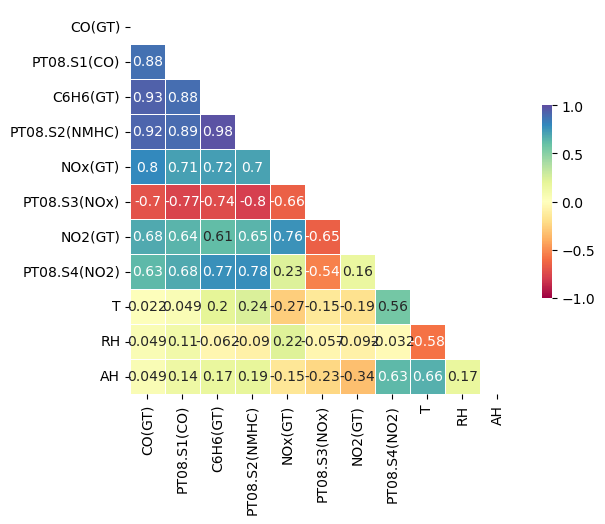

In [21]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corr, mask=mask, cmap='Spectral', vmin=-1, vmax=1, annot=True, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

- Some variables with very strong correlation will be deleted to avoid overfitting.
- Other methods of dimensionality reduction are not used to preserve interpretability.

Variables removed:
- **'PT08.S1(CO)'**
- **'PT08.S2(NMHC)'**

In [22]:
df.drop(['PT08.S1(CO)', 'PT08.S2(NMHC)'], axis=1, inplace=True)

### Outliers

#### Visualizing Outliers

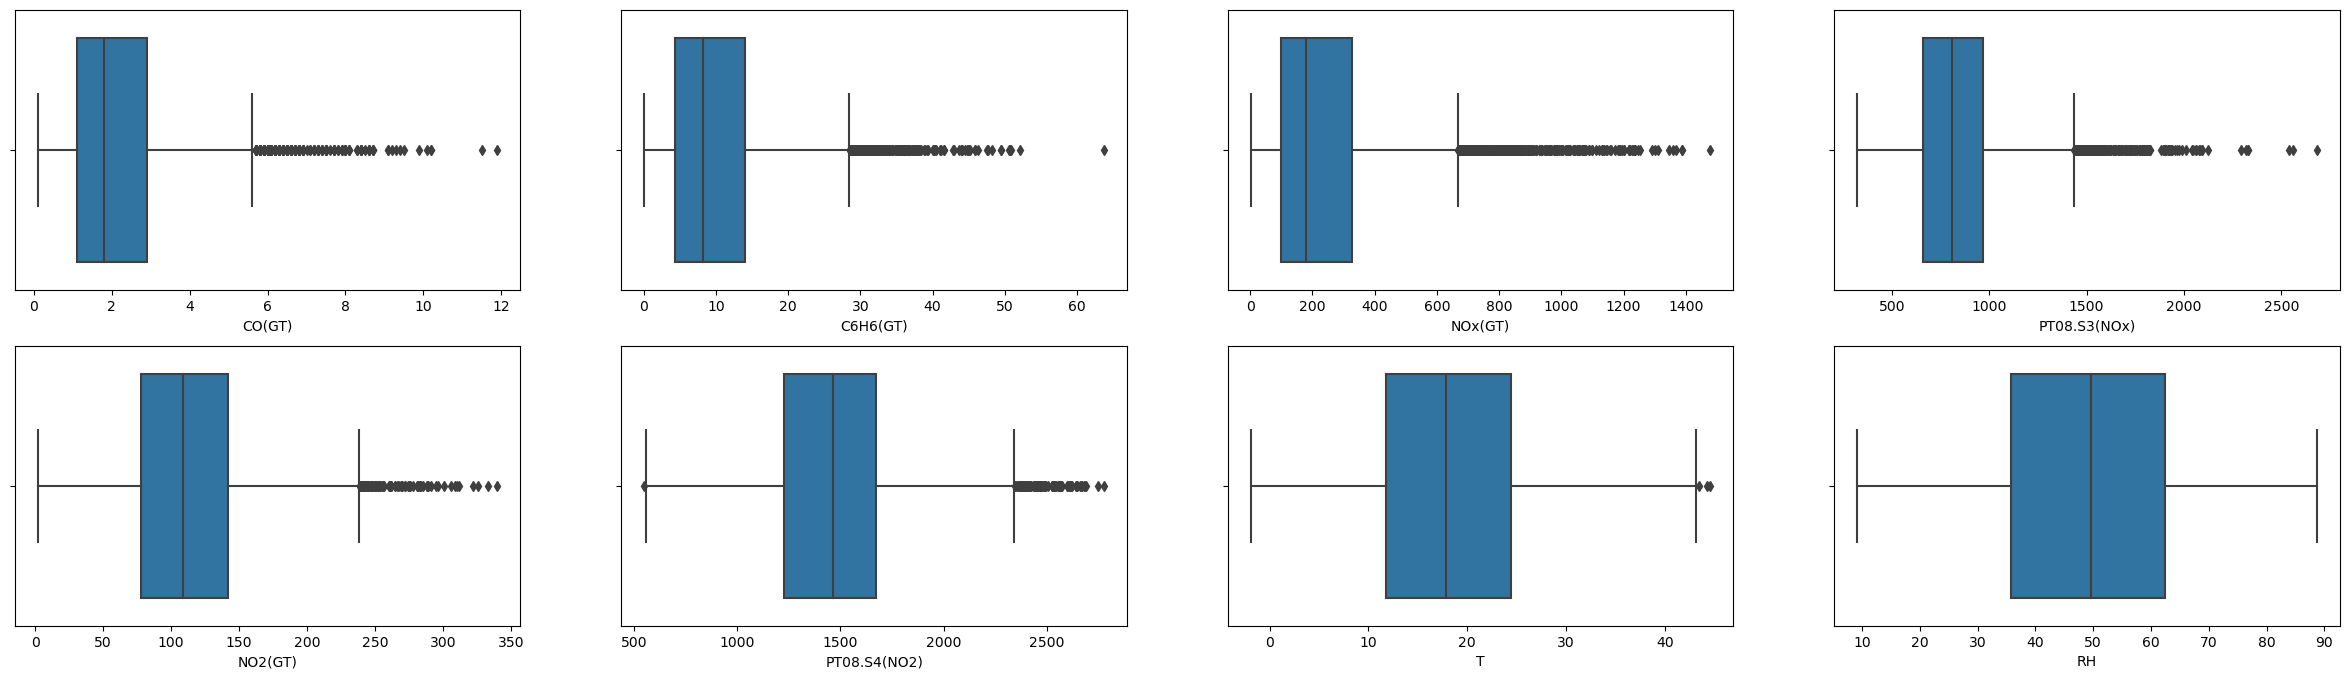

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(30, 8))

for i, j in zip(df, axes.flatten()):
    sns.boxplot(x = df[i], ax=j)

#### Identifying outliers with z-score

In [24]:
# Identify values > 2.698, which means they are outside of a normal distribution's 99.66% interval.
max_value = 2.698
outliers_idx = {} # Dictionary with column name and index of the outliers
outliers_n = {} # Dictionary with column name number of outliers
outliers_mask = {} # Dictionary with column name and mask of the outliers

for i in df:
    z_score = stats.zscore(df[i], nan_policy='omit')
    mask = abs(z_score) > max_value 
    idx = df[mask].index.tolist()
    if len(idx) != 0:
        outliers_idx[i] = idx
        outliers_n[i] = len(idx)
        outliers_mask[i] = mask

##### Number of outliers per column

In [25]:
outliers_n

{'CO(GT)': 157,
 'C6H6(GT)': 178,
 'NOx(GT)': 203,
 'PT08.S3(NOx)': 153,
 'NO2(GT)': 84,
 'PT08.S4(NO2)': 77,
 'T': 12,
 'AH': 10}

- There is not a good reason to eliminate or replace these outliers as they could represent actual measurements of odd atmospheric conditions.

## Variable Transformations

### Temperature to Kelvin

- Having only positive Temperature (**T**) values will be useful in the following analyses.

In [26]:
df['T'] = df['T'] + 273.15

### Log Transformation

#### Calculating Skewness

In [27]:
skewness = df.skew()
skewness

CO(GT)          1.369753
C6H6(GT)        1.361532
NOx(GT)         1.715781
PT08.S3(NOx)    1.101729
NO2(GT)         0.621715
PT08.S4(NO2)    0.205388
T               0.309353
RH             -0.037928
AH              0.251388
dtype: float32

The normality of variables could be improved with a logarithmic transformation.

#### Transformation

In [28]:
new_cols = {}

for i in df:
    log_col= np.log(df[i])
    new_skew = log_col.skew()
    if abs(skewness.loc[i]) > abs(new_skew):
        df[i] = log_col
        new_cols[i] = i+'_log'

In [29]:
df.rename(columns=new_cols, inplace=True)

#### Skewness Comparison

In [30]:
final_skewness = df.skew()
pd.DataFrame({'Initial':skewness.values, 'Final':final_skewness.values}, index=skewness.index)

,Initial,Final
CO(GT),1.369753,-0.546282
C6H6(GT),1.361532,-0.659467
NOx(GT),1.715781,-0.294273
PT08.S3(NOx),1.101729,0.025323
NO2(GT),0.621715,0.621715
PT08.S4(NO2),0.205388,0.205388
T,0.309353,0.244332
RH,-0.037928,-0.037928
AH,0.251388,0.251388


#### Feature Distribution Visualization

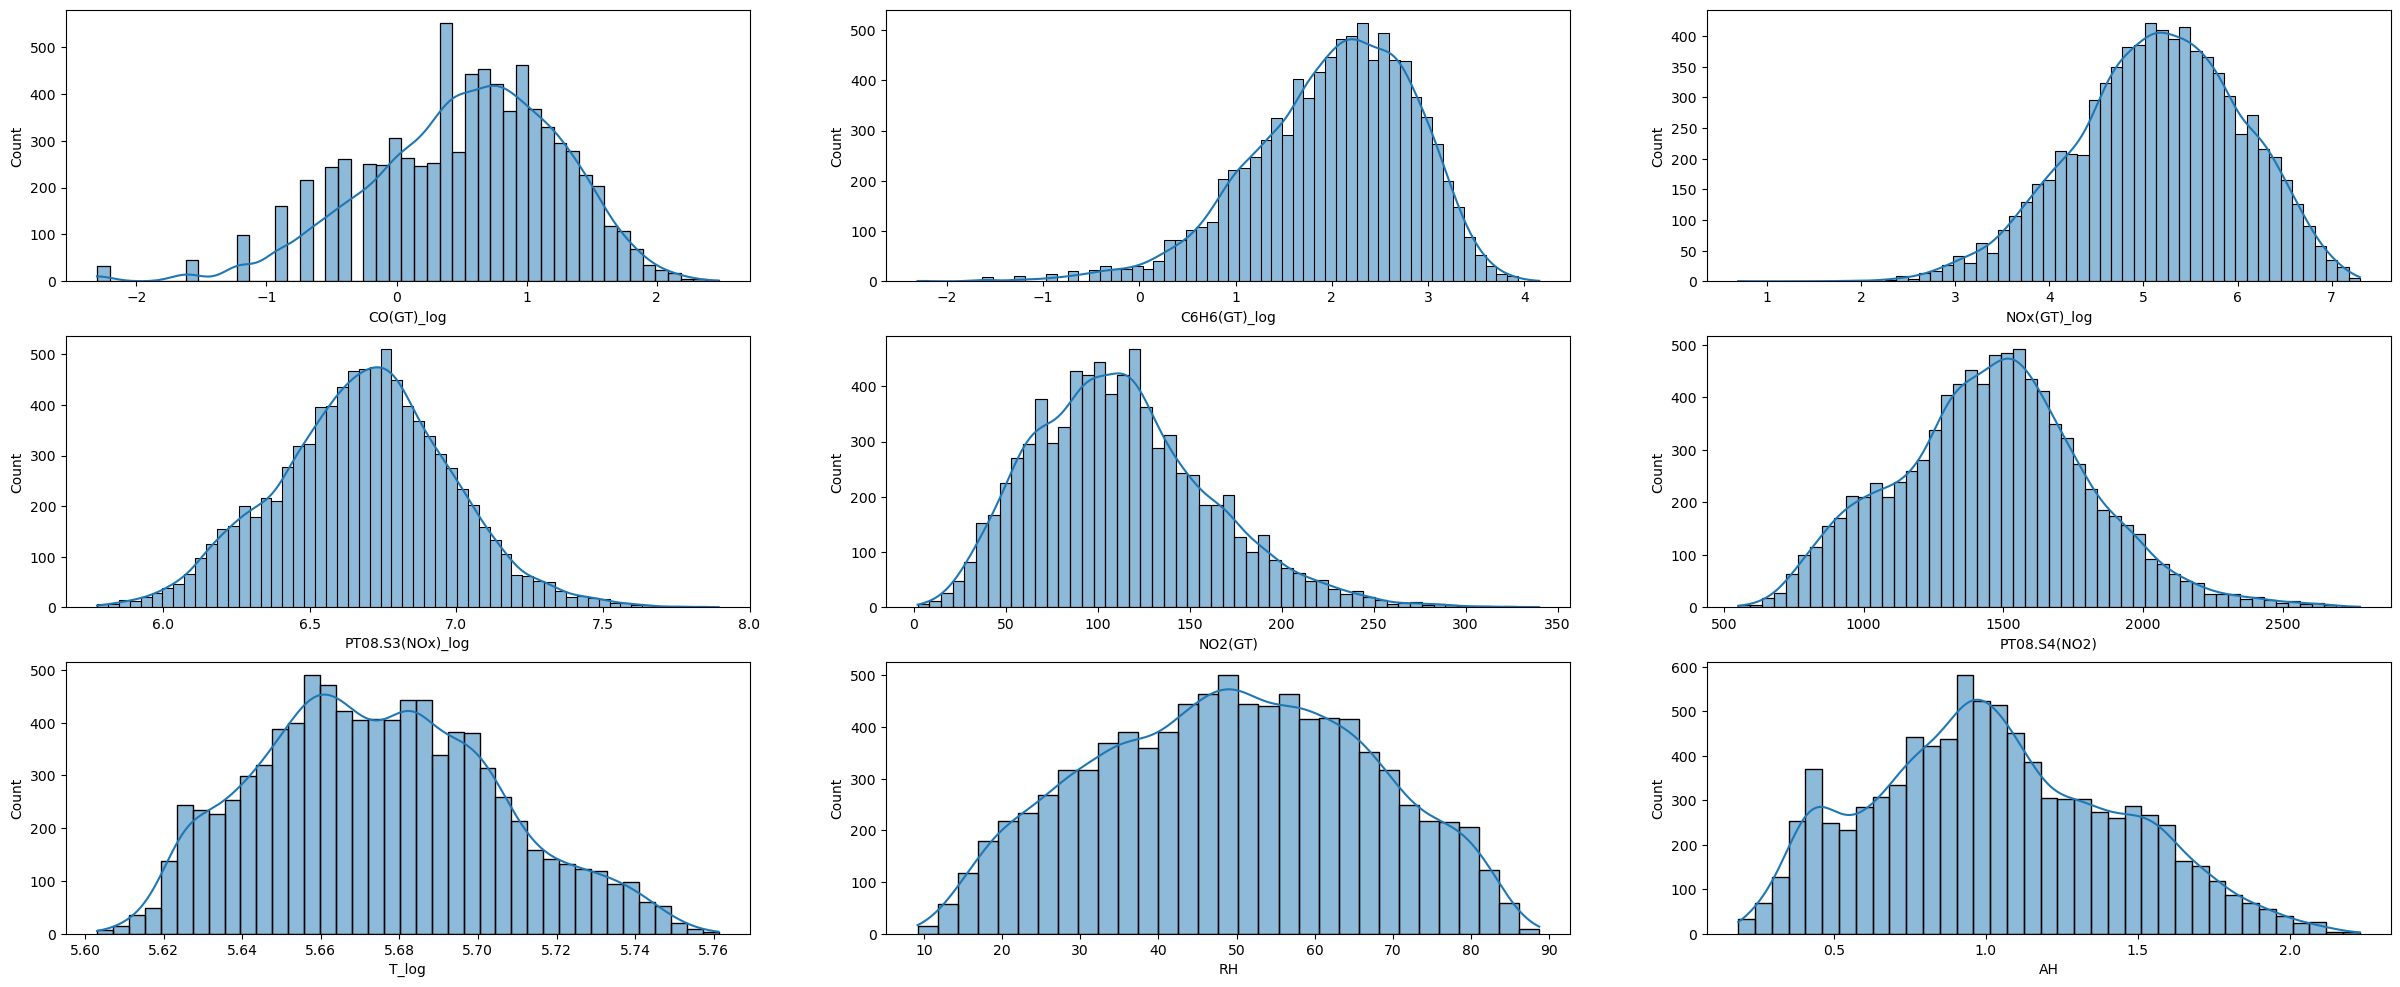

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(30, 12))

for i, j in zip(df, axes.flatten()):
    sns.histplot(x = df[i], ax=j, kde=True)

## Time Series Analysis

### Preliminary plots

#### Original Data

<AxesSubplot:xlabel='Date', ylabel='Log Temperature'>

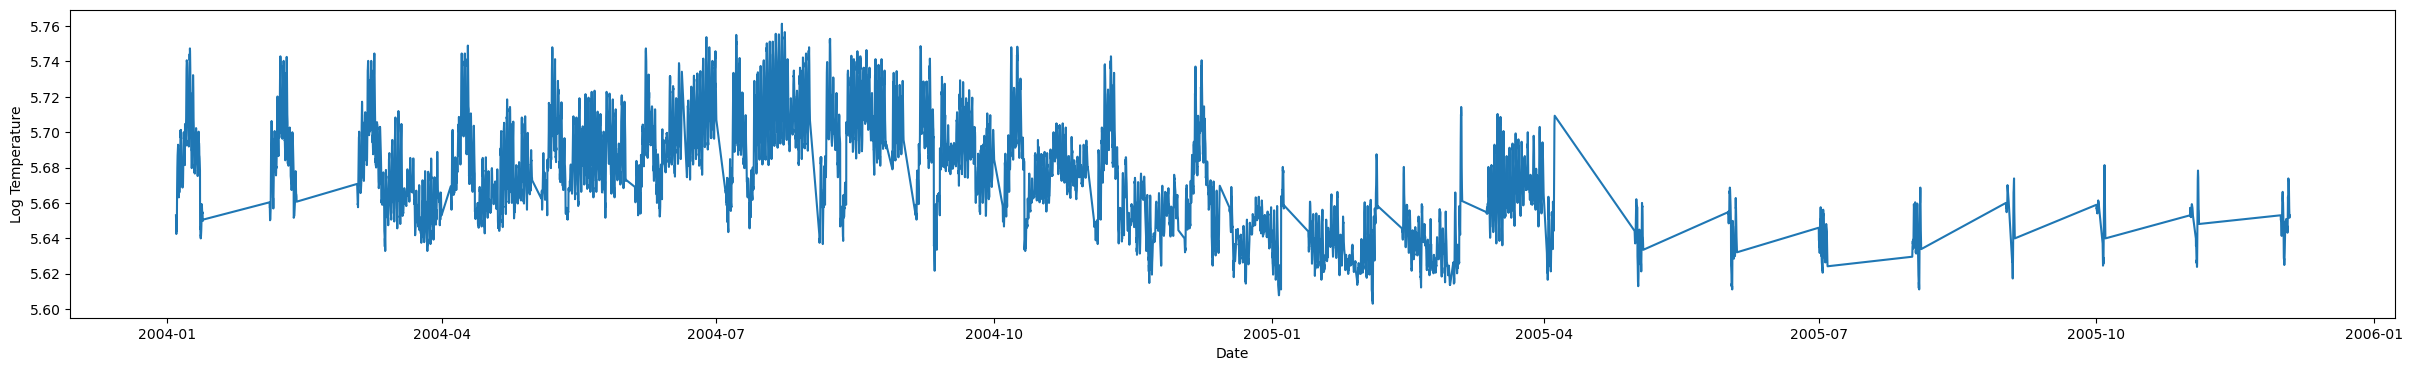

In [32]:
f, ax = plt.subplots(figsize=(30, 4))
ax.set_xlabel('Date')
ax.set_ylabel('Log Temperature')
sns.lineplot(x=df.index, y=df['T_log'])

- Variable variance is observed.

#### Seasonality Exploration

<AxesSubplot:xlabel='Month'>

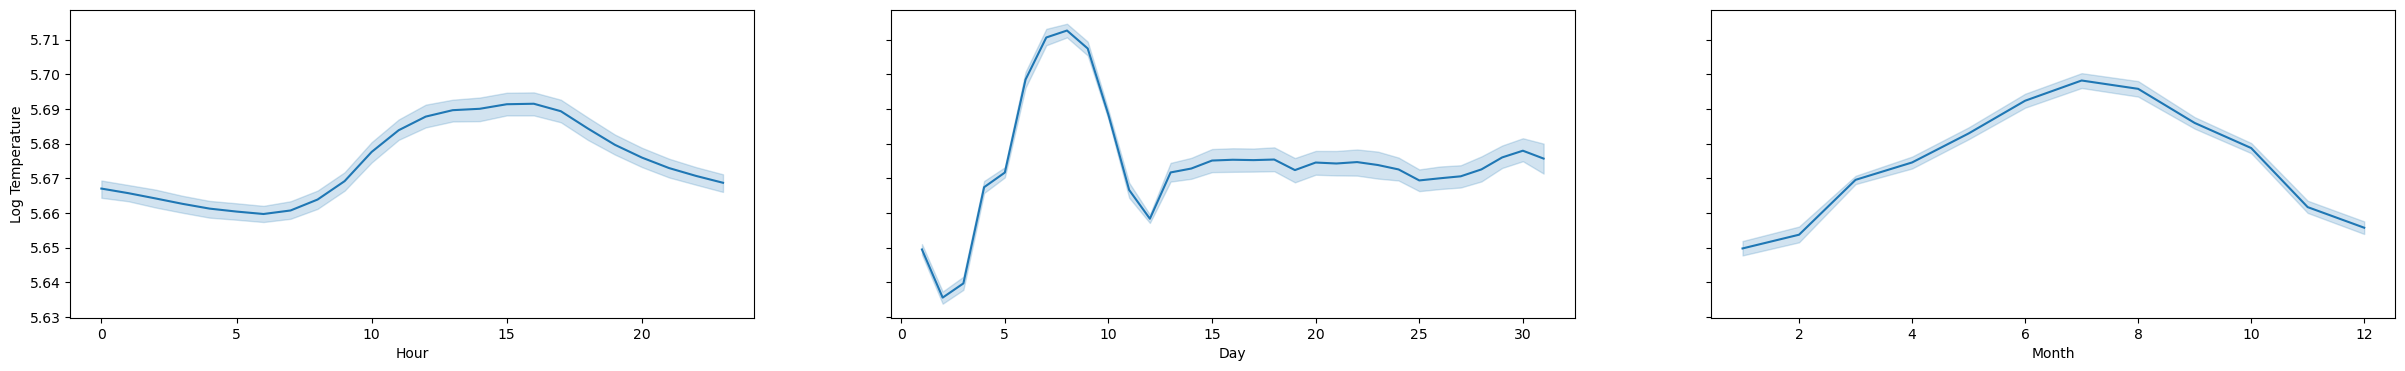

In [33]:
x_hour = pd.Series(df.index.values).dt.hour
y_hour = pd.Series(df['T_log'].values)

x_day = pd.Series(df.index.values).dt.day
y_day = pd.Series(df['T_log'].values)

x_month = pd.Series(df.index.values).dt.month
y_month = pd.Series(df['T_log'].values)

f, ax = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(30, 4))

ax[0].set_xlabel('Hour')
ax[1].set_xlabel('Day')
ax[2].set_xlabel('Month')
ax[0].set_ylabel('Log Temperature')

sns.lineplot(x=x_hour, y=y_hour, ax=ax[0])
sns.lineplot(x=x_day, y=y_day, ax=ax[1])
sns.lineplot(x=x_month, y=y_month, ax=ax[2])

- Both variable mean and variable variance are present in the data.
- It can be observed that the logarithm of the temperature (**T_log**) presents daily and yearly seasonality.
- The stationarity of logarithm of the temperature (**T_log**) will be analized based on the daily seasonality, given that it is the one with the highest frequency.

- Daily and annual seasonalities are observed.

### Remaining missing Values

#### Dates

In [34]:
complete_ts = pd.date_range(df.index[0], df.index[-1], freq='H')
complete_ts.difference(df.index)

DatetimeIndex(['2004-01-13 00:00:00', '2004-01-13 01:00:00',
               '2004-01-13 02:00:00', '2004-01-13 03:00:00',
               '2004-01-13 04:00:00', '2004-01-13 05:00:00',
               '2004-01-13 06:00:00', '2004-01-13 07:00:00',
               '2004-01-13 08:00:00', '2004-01-13 09:00:00',
               ...
               '2005-11-30 14:00:00', '2005-11-30 15:00:00',
               '2005-11-30 16:00:00', '2005-11-30 17:00:00',
               '2005-11-30 18:00:00', '2005-11-30 19:00:00',
               '2005-11-30 20:00:00', '2005-11-30 21:00:00',
               '2005-11-30 22:00:00', '2005-11-30 23:00:00'],
              dtype='datetime64[ns]', length=7443, freq=None)

- The dates are incomplete. The time series will be completed.

In [35]:
temperature = df['T_log']
temperature = temperature.reindex(complete_ts)
df_temp = pd.DataFrame(temperature)

#### Temperature

- The imputations are done based on the daily and annual seasonalities observed.

In [36]:
hour = pd.Series(temperature.index.values).dt.hour
month = pd.Series(temperature.index.values).dt.month

df_temp.reset_index(inplace=True)
df_temp.rename(columns={'index':'DateTime'}, inplace=True)

df_temp.insert(1, 'Month', month)
df_temp.insert(2, 'Hour', hour)

In [37]:
df_interpol = df_temp.groupby(['DateTime', 'Hour', 'Month']).mean()
df_interpol['T_log'].interpolate(inplace=True)

In [38]:
dates = df_interpol['T_log'].index.get_level_values('DateTime')
temp = df_interpol['T_log'].values
hourly_temp = pd.Series(data=temp, index=dates, name='hourly_temp')

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
scaled_temp = scaler.fit_transform(hourly_temp.values.reshape(-1, 1))
hourly_temp = pd.Series(data=scaled_temp.ravel(), index=dates, name='hourly_temp')

In [41]:
hourly_temp

DateTime
2004-01-04 00:00:00   -0.406555
2004-01-04 01:00:00   -0.471174
2004-01-04 02:00:00   -0.574809
2004-01-04 03:00:00   -0.796023
2004-01-04 04:00:00   -0.639744
                         ...   
2005-12-03 19:00:00   -0.149169
2005-12-03 20:00:00   -0.251909
2005-12-03 21:00:00   -0.406555
2005-12-03 22:00:00   -0.458233
2005-12-03 23:00:00   -0.406555
Name: hourly_temp, Length: 16800, dtype: float32

### Upsampling

In [42]:
daily_temp = hourly_temp.resample('D').mean()
weekly_temp = hourly_temp.resample('W').mean()
monthly_temp = hourly_temp.resample('M').mean()
quaterly_temp = hourly_temp.resample('Q').mean()

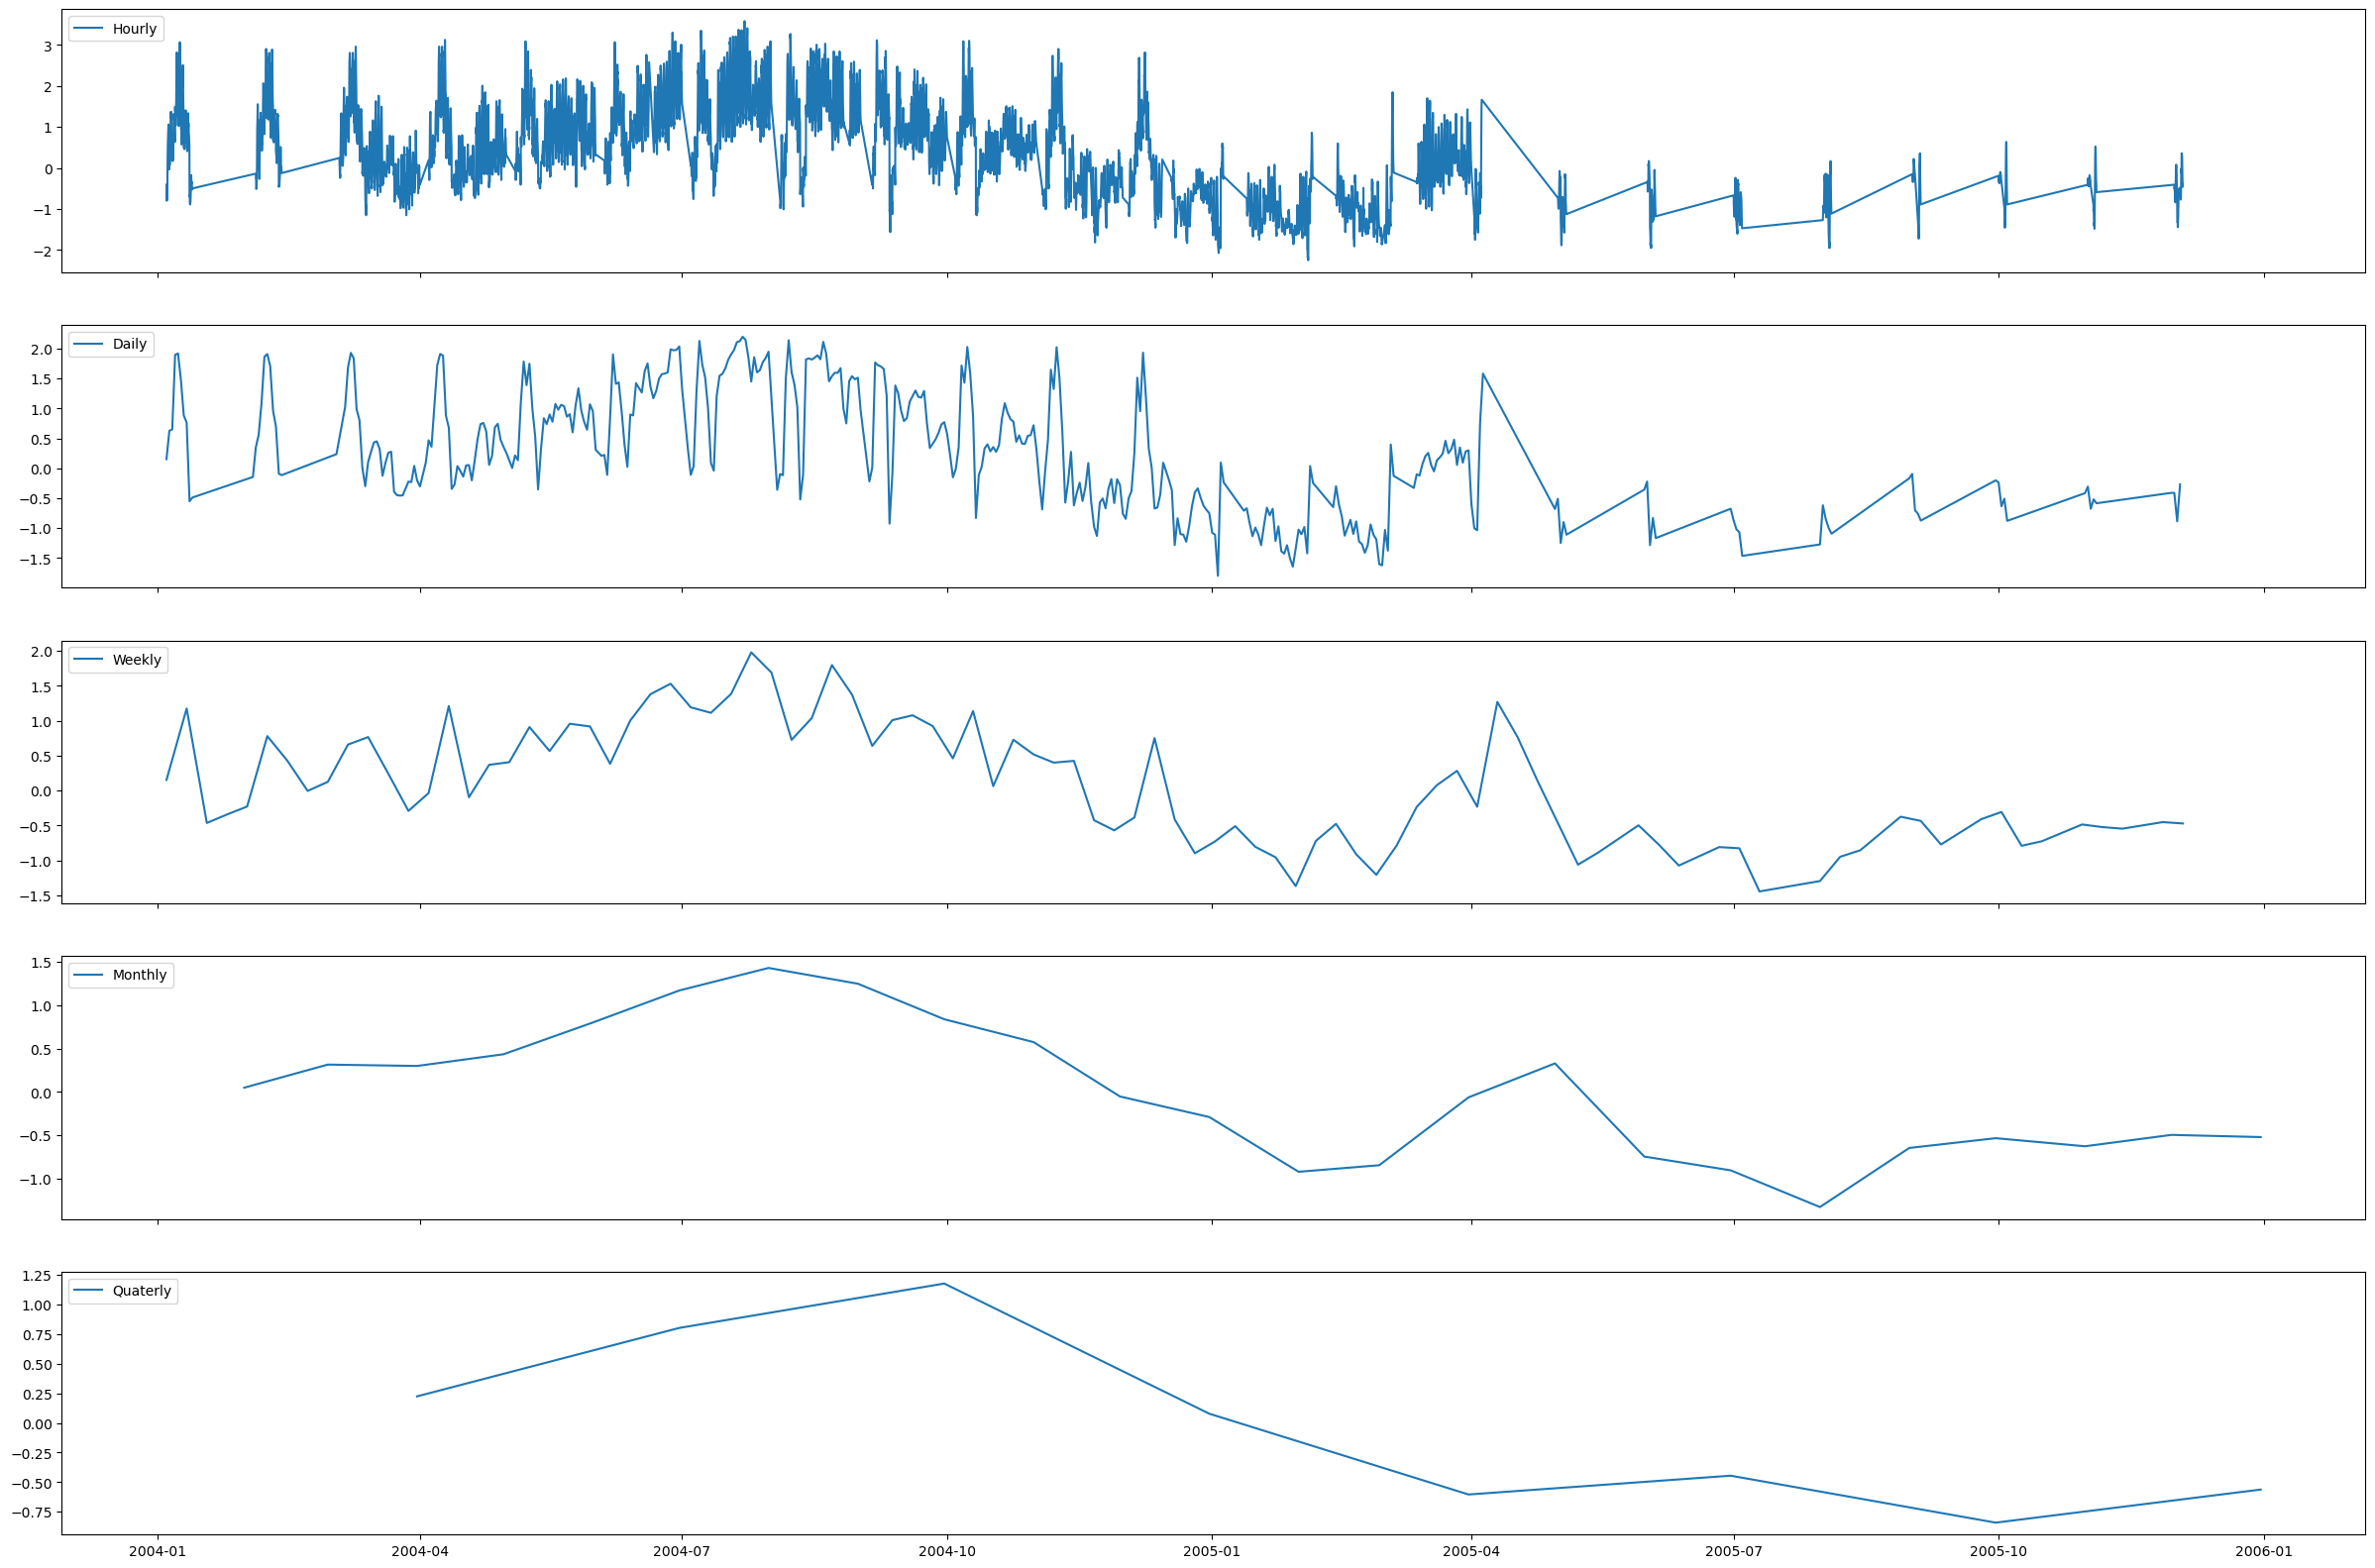

In [43]:
fig, axes = plt.subplots(5, 1, sharex=True, sharey=False, figsize=(30, 20))

axes[0].plot(hourly_temp, label='Hourly')
axes[0].legend(loc='upper left')

axes[1].plot(daily_temp, label='Daily')
axes[1].legend(loc='upper left');

axes[2].plot(weekly_temp, label='Weekly')
axes[2].legend(loc='upper left');

axes[3].plot(monthly_temp, label='Monthly')
axes[3].legend(loc='upper left');

axes[4].plot(quaterly_temp, label='Quaterly')
axes[4].legend(loc='upper left')

### Stationarity Evaluation

#### Summary Statistics

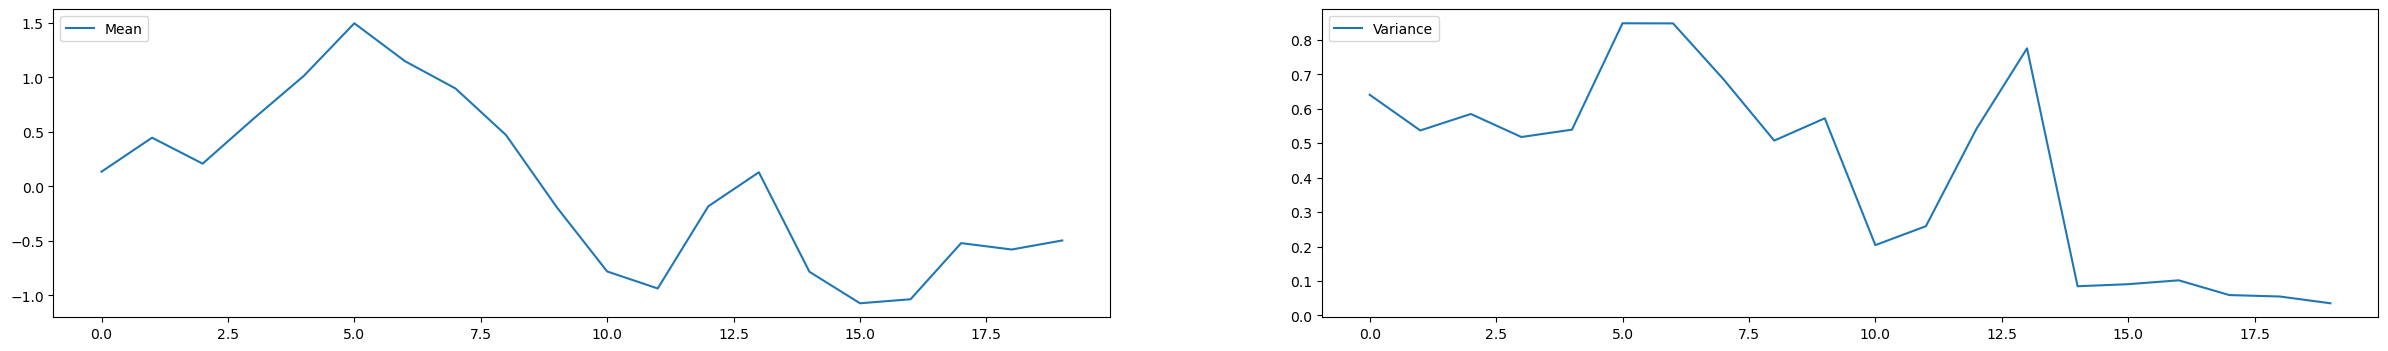

In [44]:
chunks = np.split(hourly_temp.values, indices_or_sections=20)
m = np.mean(chunks, axis=1)
v = np.var(chunks, axis=1)

f, ax = plt.subplots(1, 2, figsize=(30, 4))

ax[0].plot(m, label='Mean')
ax[0].legend(loc='upper left');
ax[1].plot(v, label='Variance')
ax[1].legend(loc='upper left');

- There is significant variability in mean and variance.

#### Autocorrelation

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

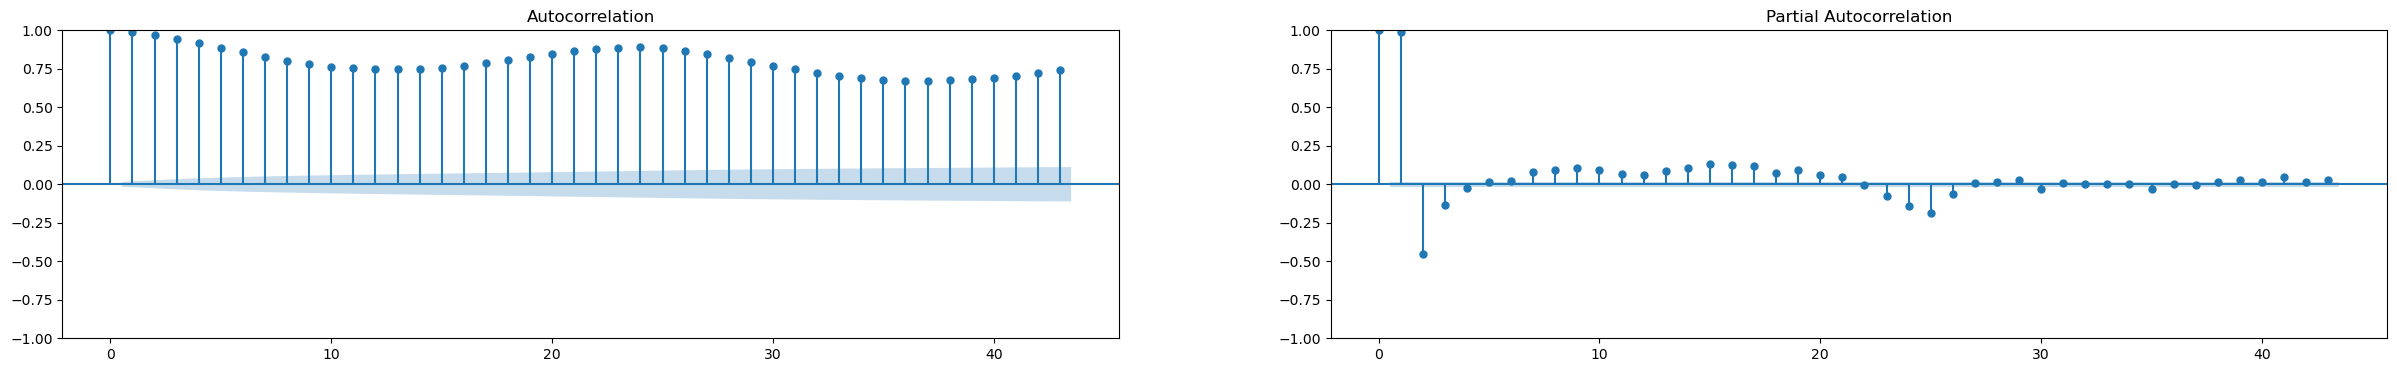

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(30, 4))

plot_acf(hourly_temp, ax=ax[0], alpha=0.05);
plot_pacf(hourly_temp, method='yw', alpha=0.05, ax=ax[1]);

- Seasonality and autocorrelation can be observed.

#### Dickey-Fuller Test

In [47]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    f, ax = plt.subplots(figsize=(30, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic             -5.256880
p-value                     0.000007
Lags Used                  44.000000
Observations Used       16755.000000
Critical Value (1%)        -3.430740
Critical Value (5%)        -2.861713
Critical Value (10%)       -2.566862
dtype: float64


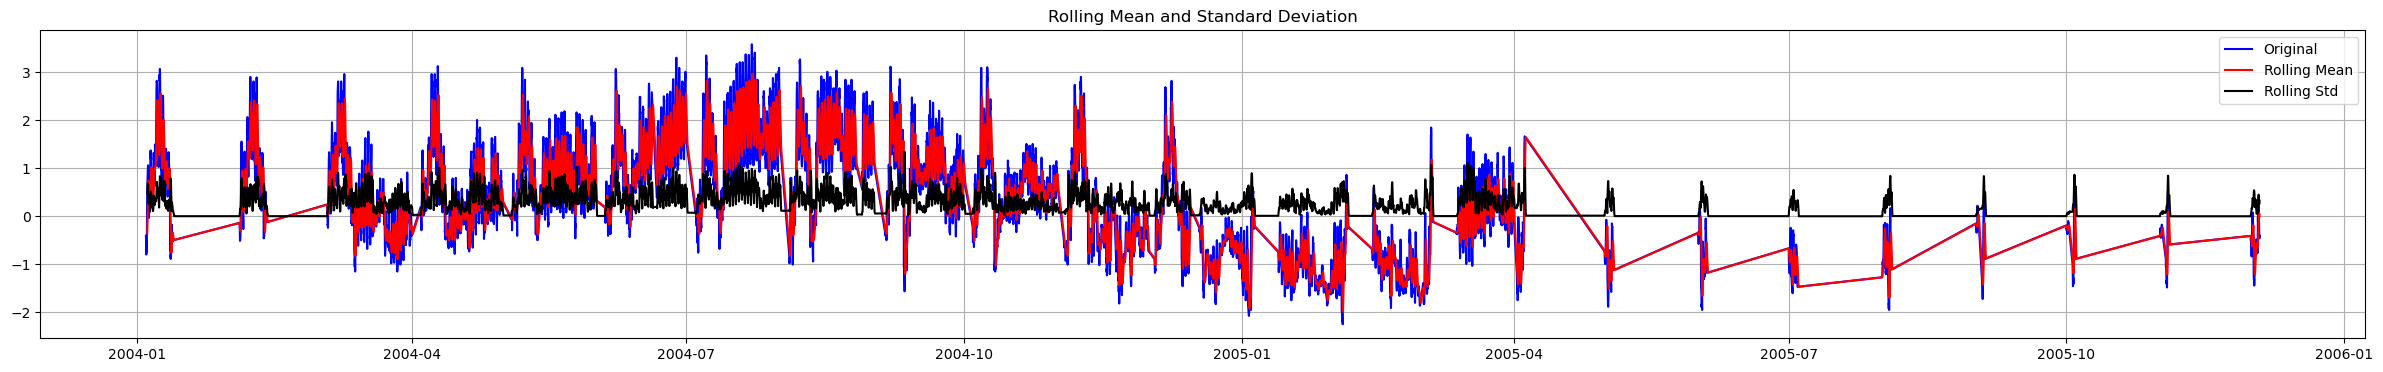

In [48]:
dftest(hourly_temp)

- p-value < 0.05. The non-stationarity hypothesis is rejected.
- However, there are seasonalities present in the data.
- Smoothing will be applied to remove them.

### Smoothing

#### Annual Seasonality 

In [49]:
from statsmodels.tsa.statespace.tools import diff

In [50]:
hourly_temp_diff = diff(hourly_temp, k_seasonal_diff=1, seasonal_periods=24*365)

- Annual seasonality cannot be removed because the data does not cover two full cycles.

#### Daily Seasonality 

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing

In [52]:
triple = ExponentialSmoothing(hourly_temp_diff, trend="additive", seasonal="additive", seasonal_periods=24, freq='H').fit(optimized=True)
trend = triple.trend
seasonality = triple.season
residuals = triple.resid

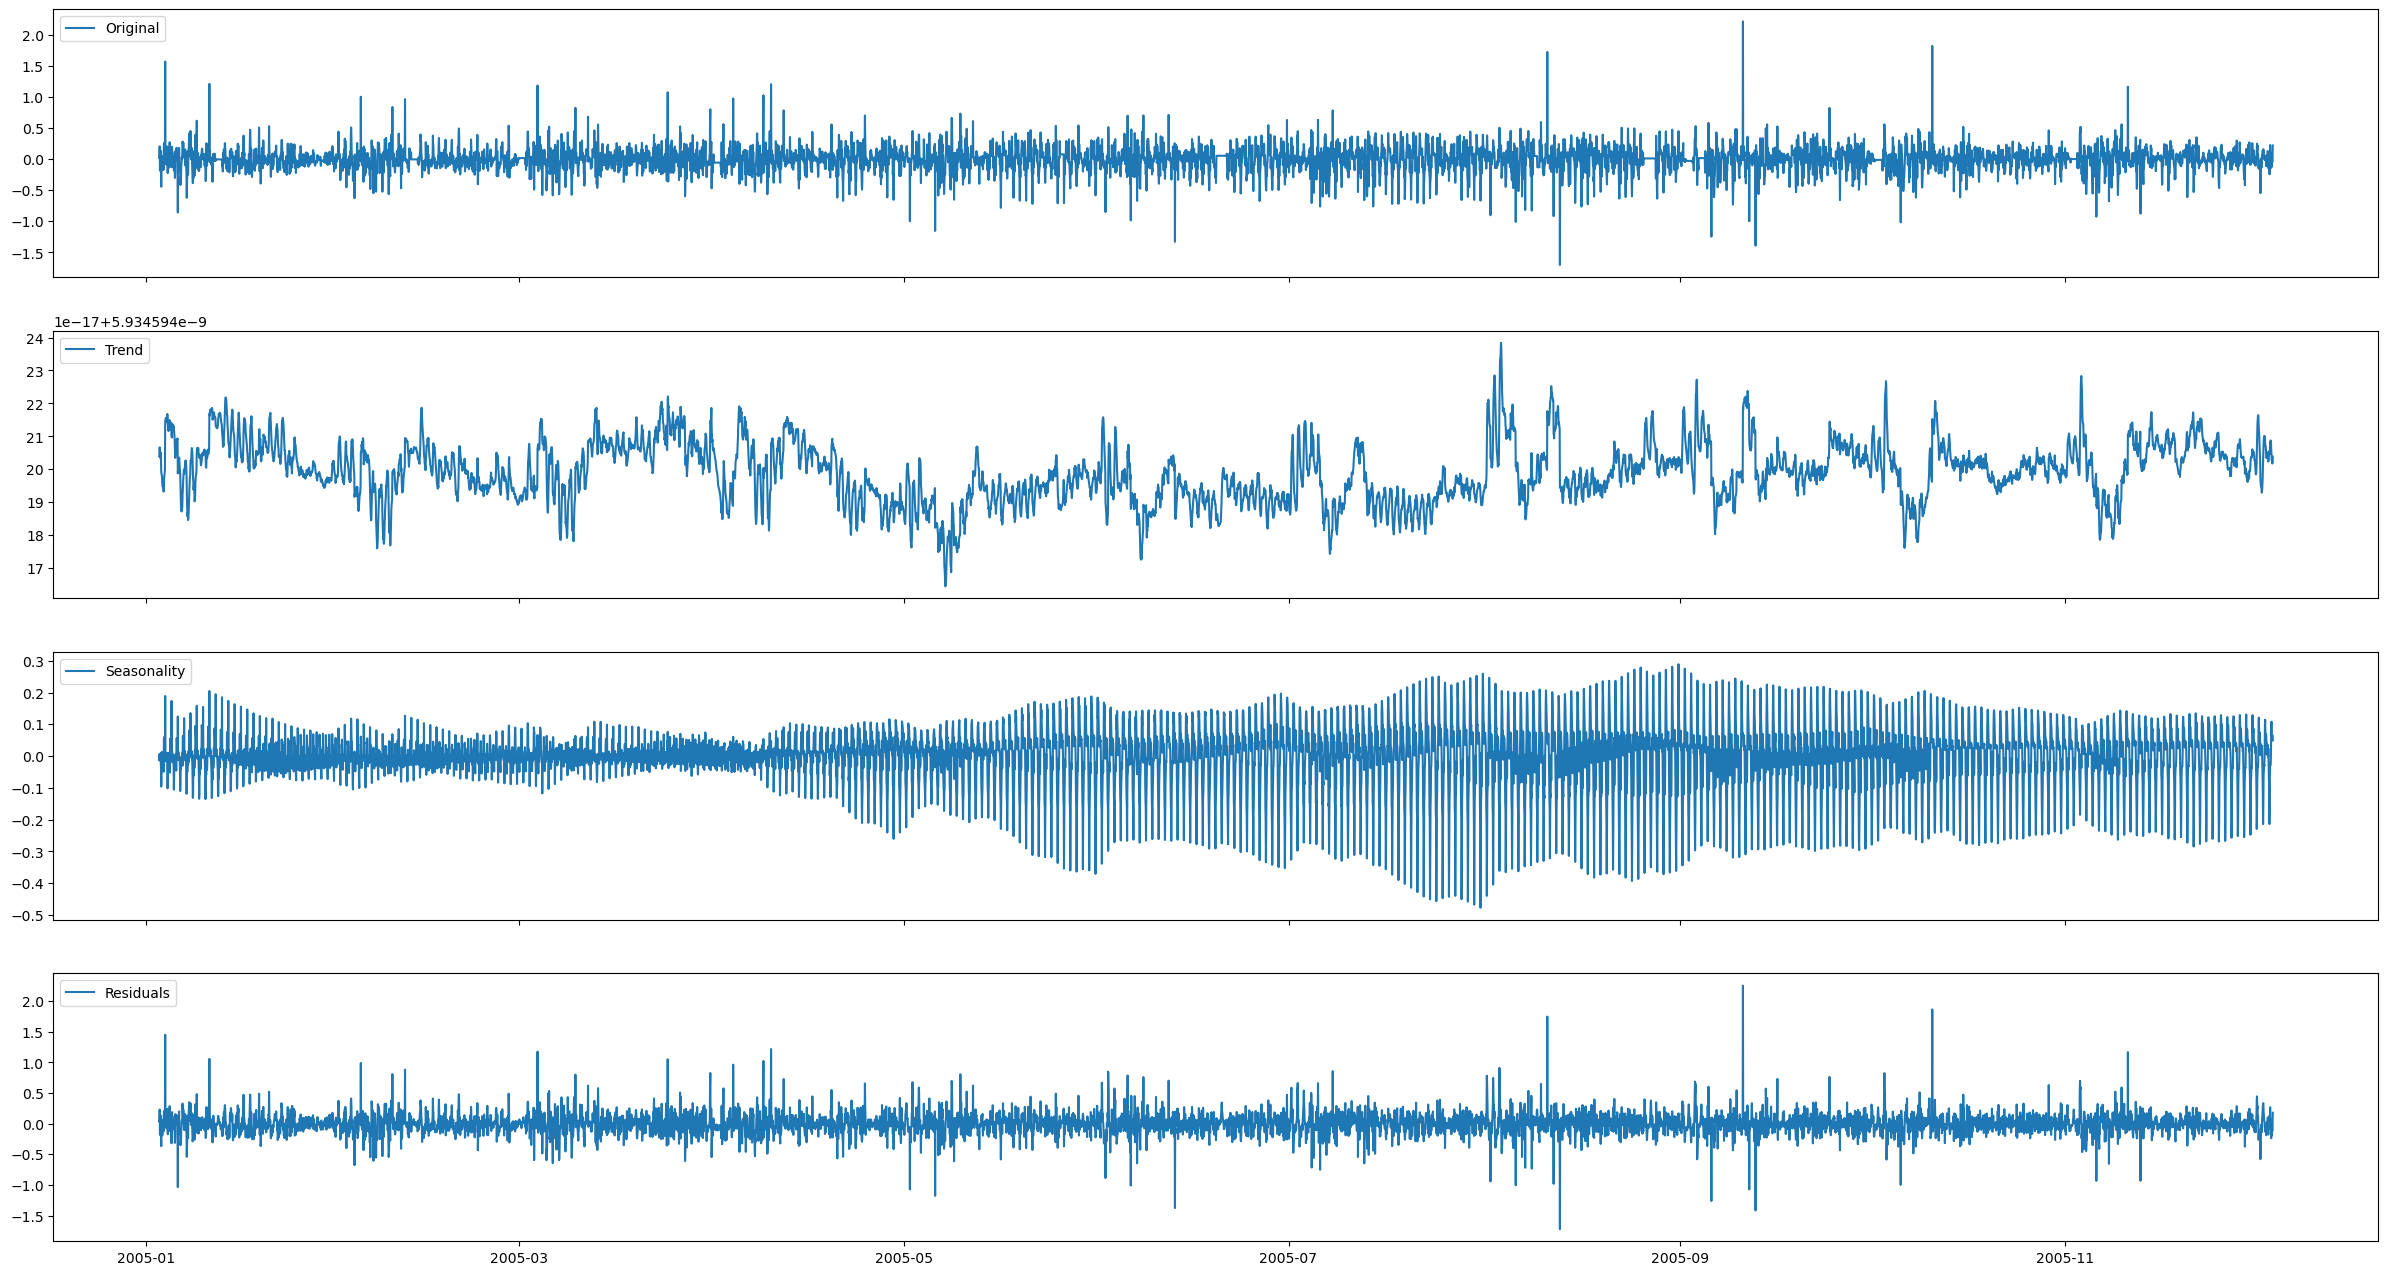

In [53]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(30, 16))

axes[0].plot(hourly_temp_diff, label='Original')
axes[0].legend(loc='upper left')

axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonality, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residuals, label='Residuals')
axes[3].legend(loc='upper left');

### Stationarity Evaluation

#### Summary Statistics

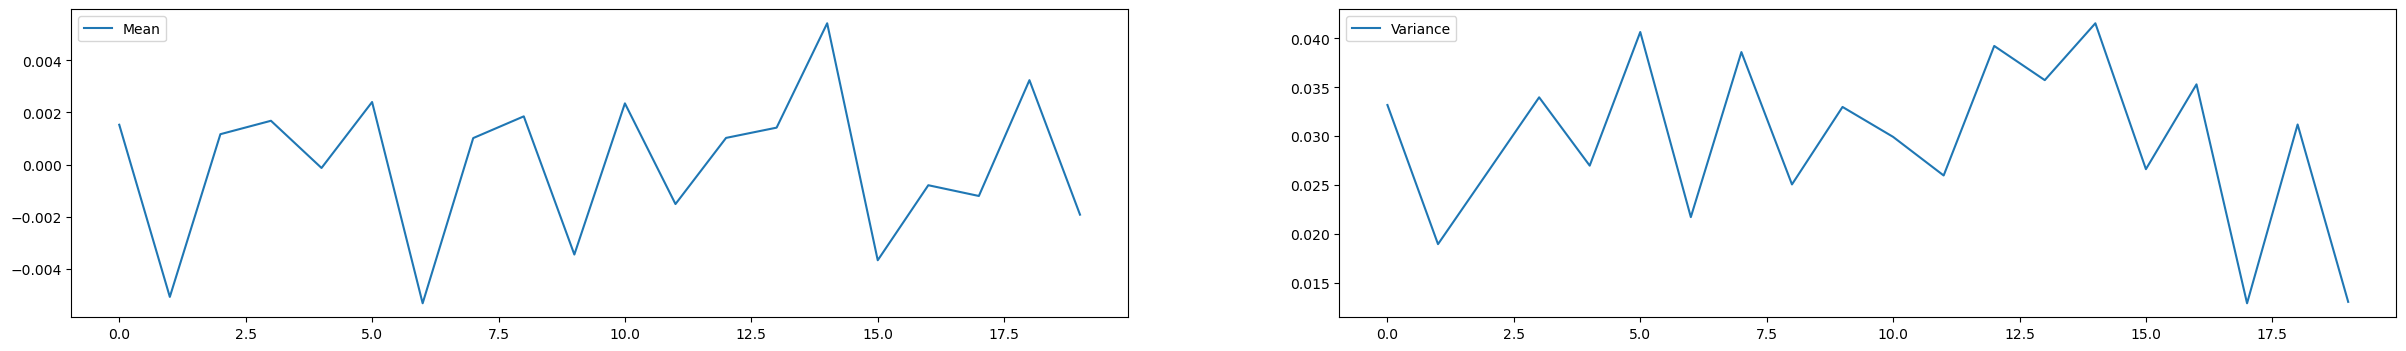

In [54]:
chunks = np.array_split(residuals, indices_or_sections=20)
m = list(map(np.mean, chunks))
v = list(map(np.var, chunks))

f, ax = plt.subplots(1, 2, figsize=(30, 4))

ax[0].plot(m, label='Mean')
ax[0].legend(loc='upper left');
ax[1].plot(v, label='Variance')
ax[1].legend(loc='upper left');

- There is no varaibility in mean or variance.

#### Dickey-Fuller Test

Test Statistic         -1.799947e+01
p-value                 2.737350e-30
Lags Used               2.800000e+01
Observations Used       8.010000e+03
Critical Value (1%)    -3.431167e+00
Critical Value (5%)    -2.861901e+00
Critical Value (10%)   -2.566962e+00
dtype: float64


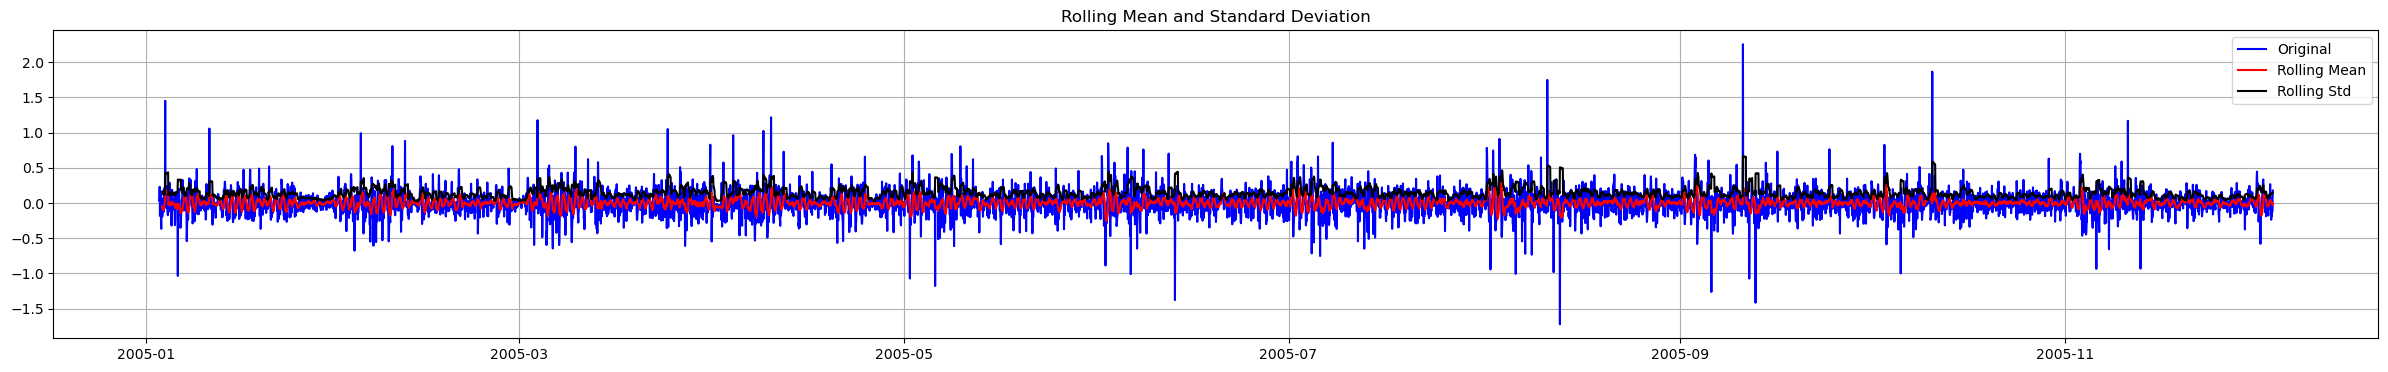

In [55]:
dftest(residuals)

- p-value < 0.05. The non-stationarity hypothesis is rejected.

#### Autocorrelation

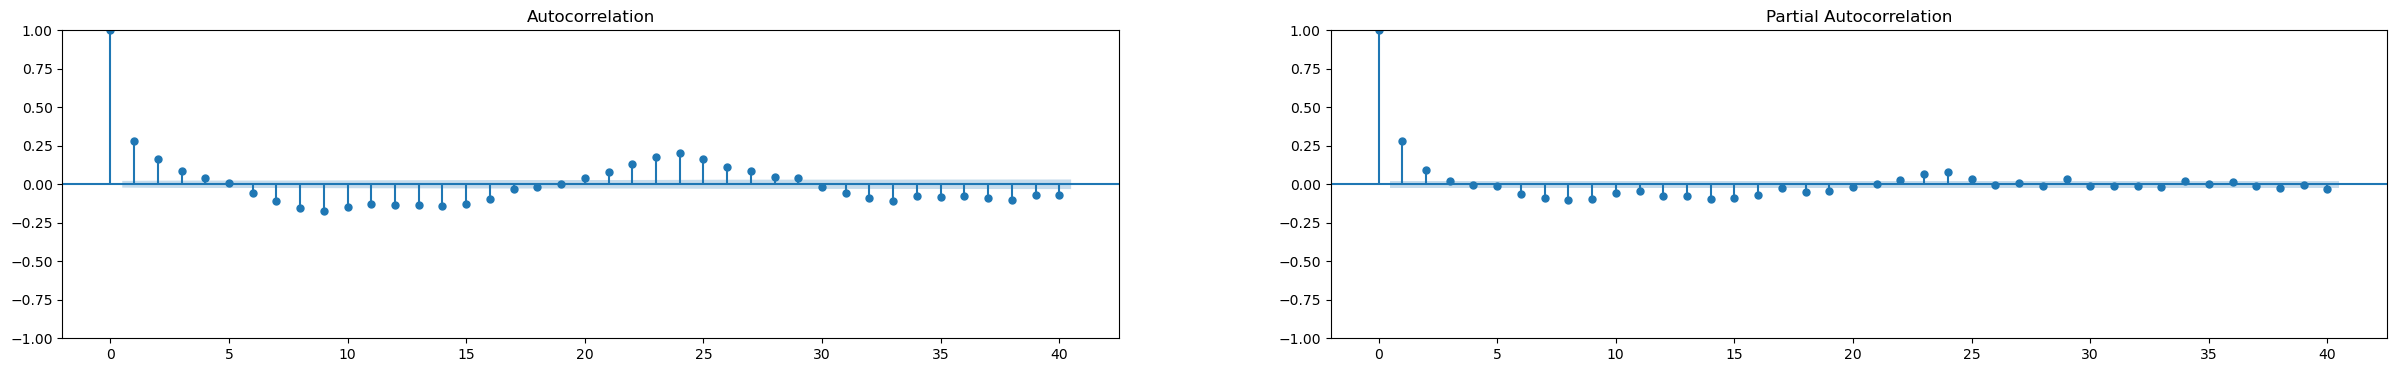

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(30, 4))

plot_acf(residuals, ax=ax[0], alpha=0.05);
plot_pacf(residuals, method='yw', ax=ax[1], alpha=0.05);

- The autocorrelation values altenate between positive and negative values while decaying to zero.
- An AR model will be applied.

## Modeling

### AR(25)

In [57]:
from statsmodels.tsa.arima.model import ARIMA

In [58]:
ar_model = ARIMA(residuals, freq='H', order=(25,0,0)).fit()
ar_residuals = ar_model.resid

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


### Autocorrelation

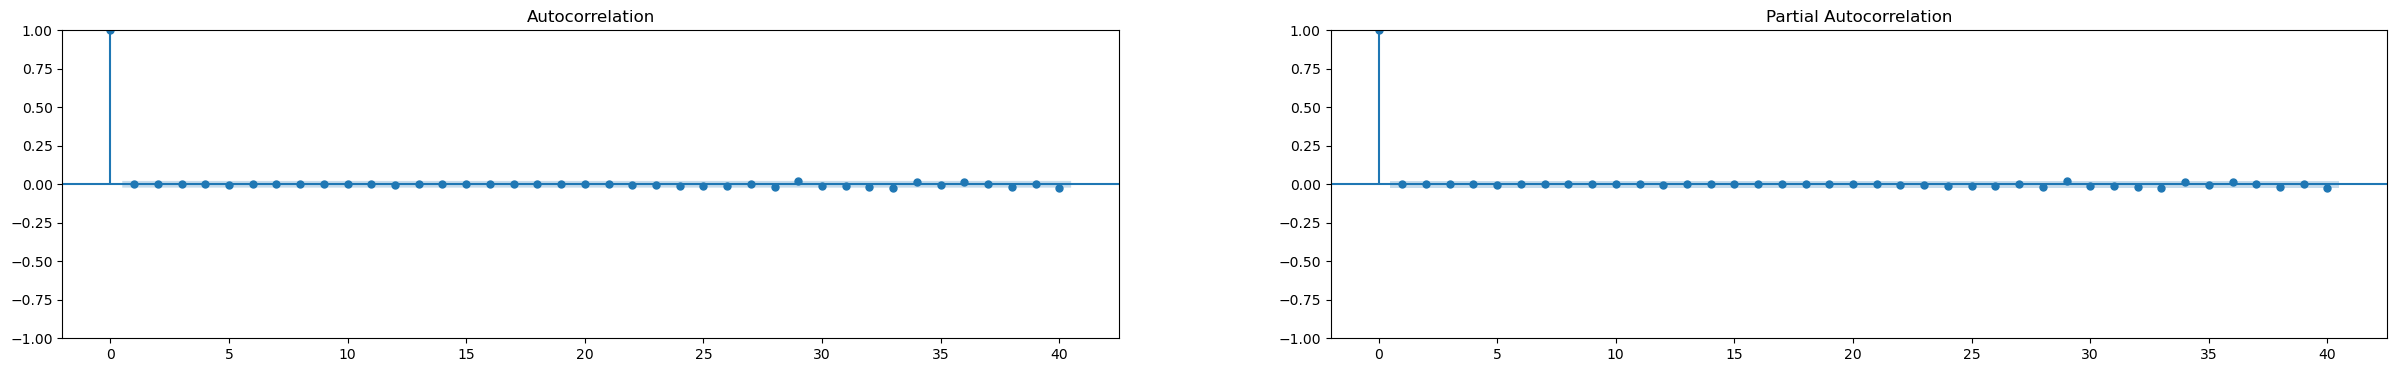

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(30, 4))

plot_acf(ar_residuals, ax=ax[0], alpha=0.05);
plot_pacf(ar_residuals, method='yw', ax=ax[1], alpha=0.05);

- The AR model improved the autocorrelation.
- There is one spike, the rest of the values are close to zero. An ARMA(1, 1) model will be applied.

### ARMA(1, 1)

In [60]:
arma_model = ARIMA(ar_residuals, freq='H', order=(1,0,1)).fit()
arma_residuals = arma_model.resid

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


### Autocorrelation

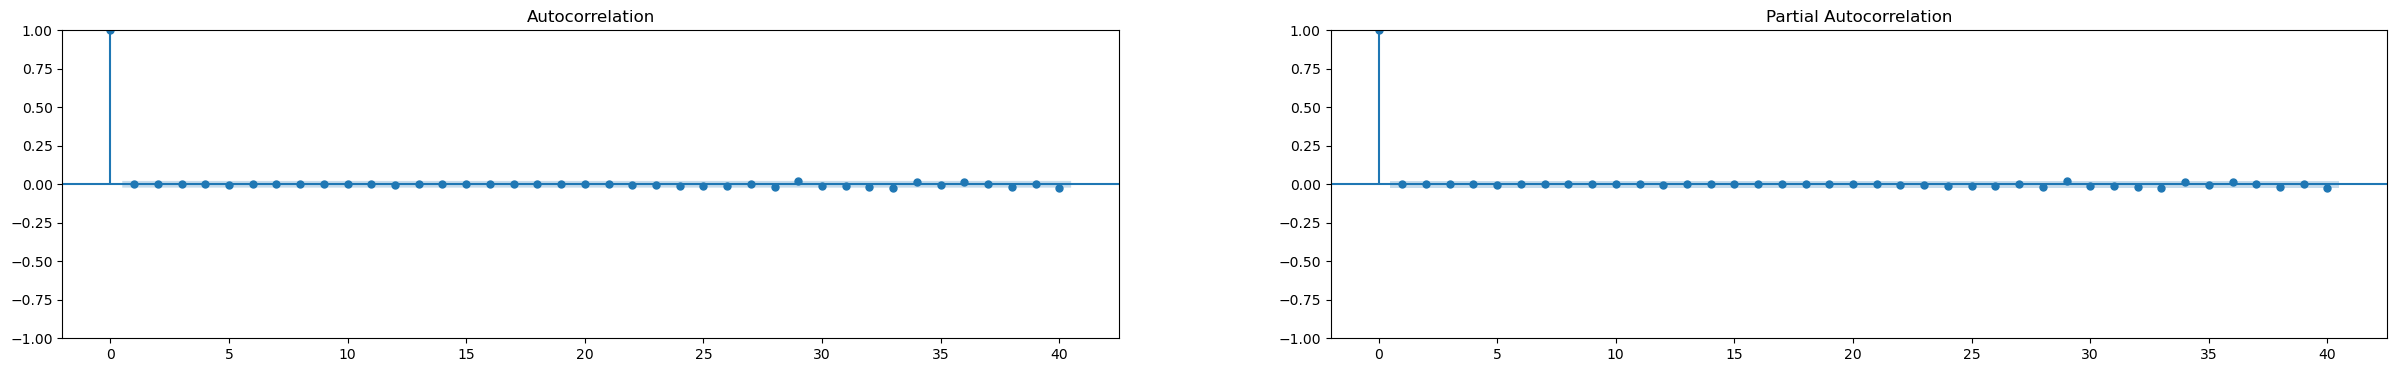

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(30, 4))

plot_acf(arma_residuals, ax=ax[0], alpha=0.05);
plot_pacf(arma_residuals, method='yw', ax=ax[1], alpha=0.05);

- The ARMA model cannot handle the lag 1 autocorrelation.
- This correlation is expected as the temperature of one day is correlated to the temperature of the previous one.
- Also, this correlation can explain all further correlations in the data.

## Key Findings

- The temperature data presented daily and annual seasonality.
- The ARMA model provided great results:

In [62]:
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8039
Model:                 ARIMA(1, 0, 1)   Log Likelihood                3474.821
Date:                Thu, 03 Nov 2022   AIC                          -6941.643
Time:                        18:30:13   BIC                          -6913.675
Sample:                    01-03-2005   HQIC                         -6932.072
                         - 12-03-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.319e-05      0.002     -0.024      0.981      -0.004       0.003
ar.L1         -0.2199     46.902     -0.005      0.996     -92.147      91.707
ma.L1          0.2201     46.902      0.005      0.996     -91.706      92.146
sigma2         0.0247      0.000    204.614      0.000       0.024       0.025
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            123191.87
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.50
Prob(H) (two-sided):                  0.66   Kurtosis:                        22.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
print('MSE:', arma_model.mse)

MSE: 0.02466504990420201


- This model will allow the stakeholders to interpret and predict temperatures, given its great results.
- An autocorrelation of lag-1 that explains all other correlations was found. This makes sense as the temperaure of day is correlated to the temperature of the previous one.

## Possible Flaws

- The data seems to lose quality after 2005-04. Consistency in quality is needed.
- The data did not have enough annual cycles to remove the annual seasonality more effectively. More data is needed.
- Other forecasting models can be explored:
    - Gradient Boosting
    - Deep Learning

## Author

Nicolas Hernandez

In [1]:
!jupyter nbconvert --to webpdf --allow-chromium-download ForecastingProject-NicolasHernandez.ipynb

[NbConvertApp] Converting notebook ForecastingProject-NicolasHernandez.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1973474 bytes to ForecastingProject-NicolasHernandez.pdf
